In [30]:
import torch
import torch.nn as nn
import torch.autograd
from torch.autograd import Variable
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.utils.data as data

In [41]:
#### cvt2tensor = transforms.ToTensor()
cvt2pil = transforms.ToPILImage()

class Spacenet_Dataset(data.Dataset):
    def __init__(self, annotationsFile,train = True, transform=None, target_transform = None):
        files = open(annotationsFile,'r')
        self.transform=transform
        self.target_transform=target_transform
        items=[]
        #print(lines[0].split('\n'))
        for line in files:
            #print(line)
            imp,_ = line.split('\n')
            ip,out = imp.split(' ')
            out = out[:-4]+'segobj.png'
            print(out)
            item = [ip,out]
            items.append(item)
        self.data = items
        self.inp_img_paths=[]
        self.out_img_paths=[]
        for dat in self.data:
            self.inp_img_paths.append(dat[0])
            self.out_img_paths.append(dat[1])
        #print(len(inp_img_paths))
              
    def getImage(self,path):
        pil_image = Image.open(path)
        pil_image = pil_image.convert('RGB')
        return pil_image

    def getImage_out(self,path):
        pil_image = Image.open(path)
        pil_image = pil_image.convert('L')
        return pil_image
    
    def __getitem__(self, index):
        counter = 0
        cur_in_path = self.inp_img_paths[index]
        cur_out_path = self.out_img_paths[index]            
        in_image = self.getImage(cur_in_path)
        out_image = self.getImage_out(cur_out_path)
    
        if self.transform is not None:
            in_image = self.transform(in_image)
            out_image = self.transform(out_image)
        return in_image, out_image
    
    def __len__(self):
        return len(self.inp_img_paths)
    

imgTransform = transforms.Compose([transforms.Scale((400, 400)),
                                   transforms.ToTensor()])

trainData = Spacenet_Dataset("/home/shriragk/project/AOI_2_Vegas_Train/annotations/trainval.txt",
                             transform=imgTransform)
valData = Spacenet_Dataset("/home/shriragk/project/AOI_2_Vegas_Train/annotations/test.txt",
                           transform=imgTransform)
inp,out = trainData[0]


/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2734976_36.1272176997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1671176_36.1300526997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2910476_36.2079476999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1839926_36.1265426997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2285426_36.1903976999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2689076_36.1493576998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2759276_36.2097026999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2601326_36.2044376999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/ann

/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2577026_36.1675826998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2945576_36.1640726998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2601326_36.1254626997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1717076_36.1686626998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2243576_36.1710926998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1794026_36.1844576998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2699876_36.1710926998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2577026_36.1746026998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/ann

/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2443376_36.1721726998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2138276_36.1423376998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2682326_36.1651526998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2022176_36.2535777segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2425826_36.1897226999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2524376_36.1493576998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1881776_36.1791926998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2015426_36.1816226998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annota

/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2724176_36.1552976998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2232776_36.1693376998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2145026_36.1774376998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2338076_36.2342726999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2243576_36.1482776998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2653976_36.1844576998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2232776_36.1886426998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1916876_36.1219526997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/ann

/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1839926_36.1476026998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1600976_36.2237426999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2671526_36.1974176999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2857826_36.1588076998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1969526_36.1903976999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1646876_36.2072726999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1723826_36.2290076999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2383976_36.1809476998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/ann

/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2331326_36.1254626997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1846676_36.1265426997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1611776_36.1377476997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2506826_36.1588076998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1706276_36.1827026998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1723826_36.2230676999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2338076_36.1903976999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2531126_36.1359926997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/ann

/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1899326_36.1844576998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2085626_36.1254626997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2015426_36.1932326999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2436626_36.1370726997segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.1927676_36.1693376998segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2355626_36.2307626999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2173376_36.2149676999segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annotations/RGB-PanSharpen__-115.2408276_36.2406177segobj.png
/home/shriragk/project/AOI_2_Vegas_Train/annotations/annota

In [4]:
len(valData)

3080

In [15]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        # Convolutional layers.
        self.conv1 = nn.Conv2d(3, 8, 8)
        self.conv2 = nn.Conv2d(8, 16, 6)
        self.conv3 = nn.Conv2d(16, 32, 7)
        self.conv4 = nn.Conv2d(32, 64, 3)
        
        self.deconv1 = nn.ConvTranspose2d(64,32,3)
        self.deconv2 = nn.ConvTranspose2d(32,16,7)
        self.deconv3 = nn.ConvTranspose2d(16,8,6)
        self.deconv4 = nn.ConvTranspose2d(8,1,8)
        
        self.Norm_1 = nn.BatchNorm2d(8)
        self.Norm_2 = nn.BatchNorm2d(16)
        self.Norm_3 = nn.BatchNorm2d(32) 
        self.Norm_4 = nn.BatchNorm2d(64)
        self.Norm_5 = nn.BatchNorm2d(32)
        self.Norm_6 = nn.BatchNorm2d(16)
        self.Norm_7 = nn.BatchNorm2d(8)
        self.Norm_8 = nn.BatchNorm2d(1)
        
        self.pool2 = nn.MaxPool2d(2,return_indices=True)
        self.pool3 = nn.MaxPool2d(3,return_indices=True)
        
    def forward(self, x):
        
        outc1 = F.relu(self.conv1(x))
        outc1 = self.Norm_1(outc1)
        #outc1,c1_in = self.pool2(outc1)
        #print(outc1.size())
        
        outc2 = F.relu(self.conv2(outc1))
        outc2 = self.Norm_2(outc2)
        #outc2,c2_in = self.pool2(outc2)
        #print(outc2.size())
        
        outc3 = F.relu(self.conv3(outc2))
        outc3 = self.Norm_3(outc3)
        #outc3,c3_in = self.pool2(outc3)
        #print(outc3.size())
        
        outc4 = F.relu(self.conv4(outc3))
        outc4 = self.Norm_4(outc4)
        #print(outc4.size())
        
        outd1 = F.relu(self.deconv1(outc4))
        outd1 = self.Norm_5(outd1)
        #print(outd1.size(),c3_in.size())
        #outd1 = self.unpool2(outd1,c3_in)
        
        outd2 = F.relu(self.deconv2(outd1))
        outd2 = self.Norm_6(outd2)
        #print(outd2.size(),c2_in.size())
        #outd2 = self.unpool2(outd2,c2_in)
        
        outd3 = F.relu(self.deconv3(outd2))
        outd3 = self.Norm_7(outd3)
        #print(outd3.size(),c1_in.size())
        #outd3 = self.unpool2(outd3,c1_in)
        
        outd4 = F.relu(self.deconv4(outd3))
        outd4 = self.Norm_8(outd4)
        
        return outd4

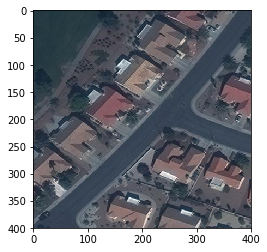

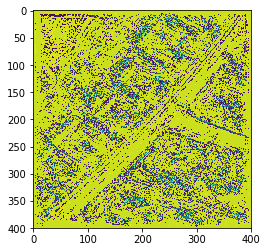

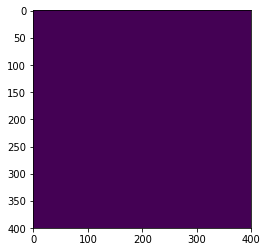

In [42]:
import random

def get_sample(model):
    #inp,out = trainData[random.randint(0,len(trainData)-1)] # change it to Valdata if necessary, dont forget to change value inside rand()
    inp,out = trainData[2]
    inp = inp.view(-1,3,400,400)
    sample_ip = torch.autograd.Variable(inp)
    sample_out = model(sample_ip)
    sample_out = sample_out.view(-1,400,400)
    sample_out = cvt2pil(sample_out.data.cpu())
    sample_inp = cvt2pil(inp.view(-1,400,400))
    
    plt.imshow(np.asarray(sample_inp))
    plt.show()
    plt.imshow(np.asarray(sample_out))
    plt.show()
    plt.imshow(np.asarray(cvt2pil(out.view(-1,400,400)) ))
    plt.show()

model = MyNet()
get_sample(model)

In [5]:
imgTransform = transforms.Compose([transforms.Scale((400, 400)),
                                   transforms.ToTensor()])

trainData = Spacenet_Dataset("/home/shriragk/project/AOI_2_Vegas_Train/annotations_RGB/trainval.txt",
                             transform=imgTransform)
valData = Spacenet_Dataset("/home/shriragk/project/AOI_2_Vegas_Train/annotations_RGB/test.txt",
                           transform=imgTransform)

trainLoader = torch.utils.data.DataLoader(trainData, batch_size = 8, 
                                          shuffle = True, num_workers = 8)
valLoader = torch.utils.data.DataLoader(valData, batch_size = 8, 
                                        shuffle = False, num_workers = 8)

In [6]:
from tqdm import tqdm as tqdm

train_loss=[]
test_loss=[]

def train_rnn_model(model, criterion, optimizer, trainData, valData, n_epochs = 10, use_gpu = False):      
    
    if use_gpu:
        print('using GPU!')
        model = model.cuda()
        criterion = criterion.cuda()
        
    # Training loop.
    for epoch in range(0, n_epochs):
        cum_loss = 0.0
        accuracy = 0
        
        # Make a pass over the training data.
        t = tqdm(trainData, desc = 'Training epoch %d' % epoch)
        model.train()  # This is important to call before training!
        for (i,(ip_image, out_image)) in enumerate(t): 
            #print(ip_image.size())
            #print(out_image.size())
            input_image = torch.autograd.Variable(ip_image)
            target = torch.autograd.Variable(out_image)

            if use_gpu:
                input_image = input_image.cuda()
                target = target.cuda()
            #print(target.size())
            y_ = model(input_image)
            #print(y_.size())
            optimizer.zero_grad()

            loss = criterion(y_, target.squeeze())
            cum_loss += loss.data[0]

            loss.backward()
                    # Weight and bias updates.
            optimizer.step()                

            # logging information.
            t.set_postfix(loss = cum_loss / (1 + i)) 

        train_loss.append(cum_loss/(i+1))


        # Make a pass over the validation data.
        cum_loss = 0.0
        accuracy = 0
        
        t = tqdm(valData, desc = 'Validation epoch %d' % epoch)
        model.eval()  # This is important to call before evaluating!
        for (i,(ip_image,out_image)) in enumerate(t): 
        
            input_image = torch.autograd.Variable(ip_image)
            target = torch.autograd.Variable(out_image)

            if use_gpu:
                input_image = input_image.cuda()
                target = target.cuda()
                
            y_ = model(input_image)

            loss = criterion(y_, target)
            cum_loss += loss.data[0]
            
        test_loss.append(cum_loss/(i+1))
    return model

model = MyNet()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)


# Train the previously defined model.
trained_model = train_rnn_model(nn.DataParallel(model), criterion, optimizer, trainLoader, valLoader, n_epochs = 1, use_gpu = True)

Training epoch 0:   0%|          | 0/386 [00:00<?, ?it/s]

using GPU!


Validation epoch 0: 100%|██████████| 97/97 [00:19<00:00,  5.08it/s]


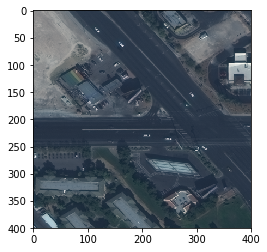

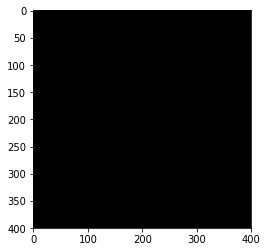

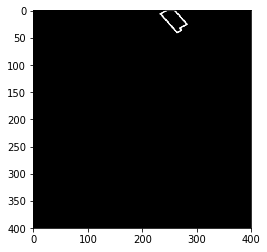

In [7]:
get_sample(trained_model)

In [14]:
print(len(trainData))

3081


In [ ]:
import random
from io import BytesIO
import IPython.display

def get_sample(model):
    inp,out = trainData[random.randint(0,3080)] # change it to Valdata if necessary, dont forget to change value inside rand()
    inp = inp.view(-1,3,400,400)
    sample_ip = torch.autograd.Variable(inp)
    sample_out = model(sample_ip)
    sample_out = sample_out.view(-1,400,400)
    #sample_out = cvt2pil(sample_out.data.cpu())
    #sample_inp = cvt2pil(inp.view(3,400,400))
    #print(sample_ip.data.view(-1,400,400))

    show_image(sample_ip.data.view(-1,400,400))
    #sample_out.data = torch.cat((sample_out.data,sample_out.data,sample_out.data))
    show_image(sample_out.data)
    #out = torch.cat((out,out,out))
    show_image(out)
    '''plt.imshow(sample_inp)
    plt.show()
    plt.imshow(sample_out)
    plt.show()'''
    #print(sample_out)
    #plt.imshow(cvt2pil(out.view(-1,400,400)) )
    #plt.show()
    
def show_image(tensor):
    f = BytesIO()
    a = np.uint8(tensor.mul(255).numpy().transpose(1, 2, 0)) 
    Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data = f.getvalue()))
    
model = MyNet()
get_sample(model)

In [44]:
import torchvision.models as models
x = models.vgg19(pretrained=True)

In [45]:
x.features

Sequential (
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU (inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU (inplace)
  (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU (inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU (inplace)
  (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU (inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU (inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU (inplace)
  (18): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (19): Conv2d(256,